Team IC24046

Members: Anthony Cheng, David Chu, Eric Huang, and Ethan Chang

In [394]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
data_dictionary = pd.read_csv("/content/sample_data/02 Data Dictionary.csv")
ff_sr = pd.read_csv("/content/sample_data/FF_SR_ data.csv")
food_cat_id = pd.read_csv("/content/sample_data/food_category_id table.csv")
nutrient_id = pd.read_csv("/content/sample_data/nutrient_id table.csv")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

ff_sr = ff_sr.drop_duplicates(["FF Food description", "FF_Component"])

In [396]:
ff_sr.head()


FF_NDB  SR_NDB  food_category_id FF Food description SR Food description  \
0   16158   16158                16  Hummus, commercial  Hummus, commercial   
1   16158   16158                16  Hummus, commercial  Hummus, commercial   
2   16158   16158                16  Hummus, commercial  Hummus, commercial   
3   16158   16158                16  Hummus, commercial  Hummus, commercial   
4   16158   16158                16  Hummus, commercial  Hummus, commercial   

   Nutrient_id  rank                  FF_Component  \
0         1090  5500                 Magnesium, Mg   
1         1258  9700  Fatty acids, total saturated   
2         1089  5400                      Iron, Fe   
3         1051   100                         Water   
4         1103  6200                  Selenium, Se   

                   SR_Component unit_name  ...  SR Min  SR Max   Std_Error  \
0                 Magnesium, Mg        MG  ...     NaN     NaN         NaN   
1  Fatty acids, total saturated         G  ...     NaN     NaN         NaN   
2                      Iron, Fe        MG  ...     NaN     NaN         NaN   
3                         Water         G  ...     NaN     NaN         NaN   
4                  Selenium, Se        UG  ...     NaN     NaN         NaN   

   SR Num_Data_pts  FF Mean per 100g  FF Min  FF Max  FF Median  \
0                2             71.10   56.60   82.00      70.40   
1                0              2.22     NaN     NaN        NaN   
2                2              2.41    1.87    2.96       2.33   
3                2             58.70   56.10   65.60      57.60   
4                0             16.20    0.00   32.30      16.20   

   FF data_points  FF Publication Date  
0            11.0             4/1/2019  
1             NaN             4/1/2019  
2            11.0             4/1/2019  
3            11.0             4/1/2019  
4             2.0             4/1/2019  

[5 rows x 21 columns]

In [397]:
#splitting ff_sr
ff_df = ff_sr[["FF_NDB", "FF Food description", "Nutrient_id", "FF_Component", "FF Mean per 100g", "FF Min", "FF Max", "FF Median", "FF data_points", "FF Publication Date"]]

sr_df = ff_sr[["SR_NDB","food_category_id","SR Food description","Nutrient_id","rank", "SR_Component","unit_name","SR Mean per 100g","SR Min","SR Max"," Std_Error", "SR Num_Data_pts"]]



In [398]:
#Looks for FF - SR
net_pos = pd.DataFrame()
net_pos = ff_sr[["FF_NDB", "SR_NDB", "FF Food description","Nutrient_id","unit_name", "FF Mean per 100g", "SR Mean per 100g", "FF_Component"]]

net_pos['rank'] = ff_df["FF Mean per 100g"] - sr_df["SR Mean per 100g"];
net_pos['percent_change'] = net_pos['rank'] / sr_df["SR Mean per 100g"]
net_pos['percent_change'] = net_pos['percent_change'].fillna(0)

#net_pos['rank'] = net_pos['rank'].abs().groupby.rank(ascending=False)
#net_pos['rank'] = net_pos['rank'].abs().groupby(net_pos['rank']).rank(ascending=False)
#df['rank'] = df['columnB'].abs().groupby(df['columnA']).rank(ascending=False)



# rows sorted by percent change of mean per 100g (from SR to FF)
net_pos.sort_values(by="percent_change")

<ipython-input-398-2829cffcff94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_pos['rank'] = ff_df["FF Mean per 100g"] - sr_df["SR Mean per 100g"];
<ipython-input-398-2829cffcff94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_pos['percent_change'] = net_pos['rank'] / sr_df["SR Mean per 100g"]
<ipython-input-398-2829cffcff94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

FF_NDB  SR_NDB  \
1222    1079    1079   
4113   10224   10224   
172     1173    1173   
2075    9500    9500   
2076    9500    9500   
2078    9500    9500   
3066    1012    1012   
3053   12220   12220   
180     1173    1173   
2120    9504    9504   
3502   11109   11109   
2191    9501    9501   
890     1137    1137   
2246   11987   11987   
2255   11987   11987   
2923   16098   16098   
3525   11112   11112   
853     1133    1133   
2286   11238   11238   
3960   16069   16069   
443    12537   12537   
845     1133    1133   
3920   12036   12036   
2301   11260   11260   
3907   12151   12151   
3538    9316    9316   
2055    9040    9040   
3898   12131   12131   
2046    9040    9040   
2037    9040    9040   
3472   11143   11143   
3106    1017    1017   
3097    1017    1017   
3479   11143   11143   
4179   23270   23270   
1013    1036    1036   
1876    1001    1001   
1879    1001    1001   
1880    1001    1001   
135     1171    1171   
1882    1001    1001   
1006    7028    7028   
3093    1017    1017   
4164    5096    5096   
4157    5062    5062   
396     9123    9123   
142     1171    1171   
1891    1001    1001   
3491   11205   11205   
3075    1012    1012   
148     1172    1172   
152     1172    1172   
155     1172    1172   
3073    1012    1012   
2026    9040    9040   
168     1173    1173   
1866    1001    1001   
2890    1019    1019   
3549    9316    9316   
645     9191    9191   
2574   11243   11243   
3591    9050    9050   
3592    9050    9050   
3709   20036   20036   
2696   11960   11960   
2589   11243   11243   
2596   11950   11950   
2599   11950   11950   
3693   20031   20031   
2600   11950   11950   
2689   11124   11124   
2610   11950   11950   
2617   11950   11950   
3622    9401    9401   
3676   20008   20008   
2621   11266   11266   
2625   11266   11266   
2626   11266   11266   
662     9191    9191   
2663   11993   11993   
2642   11266   11266   
3641   20011   20011   
2648   11993   11993   
668     9191    9191   
2573   11243   11243   
2327   16222   16222   
2721   11333   11333   
3576    9302    9302   
2873    1019    1019   
2872    1019    1019   
2829    1116    1116   
2364   14091   14091   
2365   14091   14091   
2370   14091   14091   
2374   14091   14091   
2377   14091   14091   
3855   12120   12120   
2404   11457   11457   
2421   20140   20140   
2790    1088    1088   
3817    5332    5332   
1223    1079    1079   
2452    9400    9400   
2780   11821   11821   
2495    9130    9130   
3571    9302    9302   
2773   11821   11821   
3786   10219   10219   
2509   43382   43382   
2513   43382   43382   
2752   11951   11951   
3767   23572   23572   
2751   11951   11951   
3753   23562   23562   
3108    1017    1017   
2044    9040    9040   
3469   11143   11143   
4323    1035    1035   
4322    1035    1035   
1140    2047    2047   
4309    1252    1252   
1137    2047    2047   
1135    2047    2047   
4294    1025    1025   
4291    1025    1025   
47     11056   11056   
1132    2047    2047   
4283    1025    1025   
4272    1025    1025   
4271    1025    1025   
1519   11090   11090   
1526   11090   11090   
60     12563   12563   
62     12563   12563   
1545   11090   11090   
1569    1124    1124   
4266    1118    1118   
4264    1118    1118   
1105    1082    1082   
4261    1118    1118   
4260    1118    1118   
75     12563   12563   
4327    1035    1035   
1616    4582    4582   
1427    1077    1077   
1413    1077    1077   
1227    1079    1079   
1238    1079    1079   
447    12537   12537   
4382    1267    1267   
1263    1079    1079   
1268    1079    1079   
3401    9266    9266   
4373    1267    1267   
1199    1085    1085   
4372    1267    1267   
3317   12155   12155   
4366    1228    1228   
4365    1228    1228   
4358    1228    1228   
1316    7954    7954   
4354    1228    1228   
3264   12061   12061   
4348    1228    1228   
1174    1085    1085   
1343    7089    7089  

In [399]:
print(ff_sr.iloc[[1327]]["SR Mean per 100g"])
print(ff_sr.iloc[[1327]]["FF Mean per 100g"])
print((net_pos.iloc[[1327]])["percent_change"])
ff_sr.iloc[[1327]]
# row with greatest percent change (from SR to FF)

1366    0.233
Name: SR Mean per 100g, dtype: float64
1366    0.242
Name: FF Mean per 100g, dtype: float64
1366    0.038627
Name: percent_change, dtype: float64


FF_NDB  SR_NDB  food_category_id  \
1366    7089    7089                 7   

                                  FF Food description  \
1366  Sausage, Italian, pork, mild, cooked, pan-fried   

                 SR Food description  Nutrient_id  rank FF_Component  \
1366  Sausage, Italian, pork, cooked         1166  6500   Riboflavin   

     SR_Component unit_name  ...  SR Min  SR Max   Std_Error  SR Num_Data_pts  \
1366   Riboflavin        MG  ...     NaN     NaN       0.016                4   

      FF Mean per 100g  FF Min  FF Max  FF Median  FF data_points  \
1366             0.242    0.22    0.27       0.24             4.0   

      FF Publication Date  
1366           12/16/2019  

[1 rows x 21 columns]

In [400]:
# rows where the mean per 100g went to 0 (from SR to FF)
ff_sr[(ff_sr["FF Mean per 100g"]==0) & (ff_sr["SR Mean per 100g"]!=0)]

FF_NDB  SR_NDB  food_category_id  \
47     11056   11056                11   
60     12563   12563                12   
62     12563   12563                12   
63     12563   12563                12   
75     12563   12563                12   
92     12563   12563                12   
135     1171    1171                 1   
142     1171    1171                 1   
148     1172    1172                 1   
152     1172    1172                 1   
155     1172    1172                 1   
168     1173    1173                 1   
172     1173    1173                 1   
180     1173    1173                 1   
396     9123    9123                 9   
443    12537   12537                12   
447    12537   12537                12   
645     9191    9191                 9   
662     9191    9191                 9   
668     9191    9191                 9   
845     1133    1133                 1   
853     1133    1133                 1   
890     1137    1137                 1   
1006    7028    7028                 7   
1013    1036    1036                 1   
1055    1036    1036                 1   
1088    1082    1082                 1   
1105    1082    1082                 1   
1132    2047    2047                 2   
1135    2047    2047                 2   
1137    2047    2047                 2   
1140    2047    2047                 2   
1174    1085    1085                 1   
1199    1085    1085                 1   
1222    1079    1079                 1   
1223    1079    1079                 1   
1227    1079    1079                 1   
1238    1079    1079                 1   
1263    1079    1079                 1   
1268    1079    1079                 1   
1316    7954    7954                 7   
1343    7089    7089                 7   
1348    7089    7089                 7   
1413    1077    1077                 1   
1418    1077    1077                 1   
1427    1077    1077                 1   
1519   11090   11090                11   
1526   11090   11090                11   
1545   11090   11090                11   
1569    1124    1124                 1   
1616    4582    4582                 4   
1620    4582    4582                 4   
1622    4582    4582                 4   
1642    4044    4044                 4   
1645    4044    4044                 4   
1660    1123    1123                 1   
1662    1123    1123                 1   
1675    1123    1123                 1   
1716    1145    1145                 1   
1787   20481   20481                20   
1856   20061   20061                20   
1866    1001    1001                 1   
1876    1001    1001                 1   
1879    1001    1001                 1   
1880    1001    1001                 1   
1882    1001    1001                 1   
1891    1001    1001                 1   
2026    9040    9040                 9   
2037    9040    9040                 9   
2044    9040    9040                 9   
2046    9040    9040                 9   
2055    9040    9040                 9   
2075    9500    9500                 9   
2076    9500    9500                 9   
2078    9500    9500                 9   
2120    9504    9504                 9   
2191    9501    9501                 9   
2246   11987   11987                11   
2255   11987   11987                11   
2286   11238   11238                11   
2301   11260   11260                11   
2327   16222   16222                16   
2364   14091   14091                14   
2365   14091   14091                14   
2370   14091   14091                14   
2374   14091   14091                14   
2377   14091   14091                14   
2404   11457   11457                11   
2421   20140   20140                20   
2452    9400    9400                 9   
2495    9130    9130                 9   
2509   43382   43382                 9   
2513   43382   43382                 9   
2573   11243   11243                11   
2574   11243   1

In [401]:
# rows where SS mean was 0
print(len(ff_sr[ff_sr["SR Mean per 100g"]==0].index))
ff_sr[ff_sr["SR Mean per 100g"]==0]

366


FF_NDB  SR_NDB  food_category_id  \
26     16158   16158                16   
29     11056   11056                11   
33     11056   11056                11   
48     11056   11056                11   
53     12563   12563                12   
58     12563   12563                12   
71     12563   12563                12   
72     12563   12563                12   
74     12563   12563                12   
77     12563   12563                12   
110    11233   11233                11   
145     1171    1171                 1   
150     1172    1172                 1   
151     1172    1172                 1   
156     1172    1172                 1   
161     1172    1172                 1   
162     1172    1172                 1   
164     1172    1172                 1   
175     1173    1173                 1   
181     1173    1173                 1   
183     1173    1173                 1   
185     1173    1173                 1   
189    11296   11296                11   
215    11296   11296                11   
219    11296   11296                11   
232    11296   11296                11   
236    11937   11937                11   
242    11937   11937                11   
248    11937   11937                11   
251    11937   11937                11   
253    11937   11937                11   
254    11937   11937                11   
271    11937   11937                11   
279     1032    1032                 1   
284     1032    1032                 1   
286     1032    1032                 1   
288     1032    1032                 1   
293     1032    1032                 1   
305     1032    1032                 1   
309     1032    1032                 1   
310     1032    1032                 1   
312     1032    1032                 1   
313     1032    1032                 1   
317     1032    1032                 1   
318     1032    1032                 1   
324     1042    1042                 1   
326     1042    1042                 1   
330     1042    1042                 1   
331     1042    1042                 1   
344     1042    1042                 1   
365     1042    1042                 1   
367     1042    1042                 1   
381     9123    9123                 9   
392     9123    9123                 9   
402     9123    9123                 9   
408    12537   12537                12   
413    12537   12537                12   
428    12537   12537                12   
435    12537   12537                12   
437    12537   12537                12   
440    12537   12537                12   
442    12537   12537                12   
446    12537   12537                12   
448    12537   12537                12   
449    12537   12537                12   
450    12537   12537                12   
460    18069   18069                18   
480    18069   18069                18   
482    18069   18069                18   
494     2046    2046                 2   
504     2046    2046                 2   
533     2046    2046                 2   
537     2046    2046                 2   
543     2046    2046                 2   
544     2046    2046                 2   
549     2046    2046                 2   
552     2046    2046                 2   
555     2046    2046                 2   
559     2046    2046                 2   
563     9148    9148                 9   
578     9148    9148                 9   
579     9148    9148                 9   
583     9148    9148                 9   
595     9148    9148                 9   
608     9148    9148                 9   
615     9148    9148                 9   
617     9148    9148                 9   
620     9148    9148                 9   
634     9191    9191                 9   
641     9191    9191                 9   
647     9191    9191                 9   
665     9191    9191                 9   
670     9191    9191                 9   
672     9191    9191                 9   
674     9191    

In [402]:
#FF and SR that have Mean Per 100g = 0
zero_change = ff_sr[(ff_sr["SR Mean per 100g"]==0) & (ff_sr["FF Mean per 100g"]==0)]
zero_change

FF_NDB  SR_NDB  food_category_id  \
26     16158   16158                16   
29     11056   11056                11   
33     11056   11056                11   
48     11056   11056                11   
53     12563   12563                12   
58     12563   12563                12   
72     12563   12563                12   
74     12563   12563                12   
77     12563   12563                12   
110    11233   11233                11   
145     1171    1171                 1   
151     1172    1172                 1   
161     1172    1172                 1   
162     1172    1172                 1   
164     1172    1172                 1   
183     1173    1173                 1   
185     1173    1173                 1   
189    11296   11296                11   
215    11296   11296                11   
219    11296   11296                11   
232    11296   11296                11   
236    11937   11937                11   
242    11937   11937                11   
248    11937   11937                11   
251    11937   11937                11   
253    11937   11937                11   
254    11937   11937                11   
271    11937   11937                11   
279     1032    1032                 1   
284     1032    1032                 1   
286     1032    1032                 1   
288     1032    1032                 1   
293     1032    1032                 1   
305     1032    1032                 1   
309     1032    1032                 1   
310     1032    1032                 1   
312     1032    1032                 1   
313     1032    1032                 1   
317     1032    1032                 1   
318     1032    1032                 1   
324     1042    1042                 1   
326     1042    1042                 1   
330     1042    1042                 1   
331     1042    1042                 1   
344     1042    1042                 1   
365     1042    1042                 1   
367     1042    1042                 1   
381     9123    9123                 9   
392     9123    9123                 9   
402     9123    9123                 9   
413    12537   12537                12   
428    12537   12537                12   
437    12537   12537                12   
440    12537   12537                12   
442    12537   12537                12   
446    12537   12537                12   
448    12537   12537                12   
449    12537   12537                12   
460    18069   18069                18   
480    18069   18069                18   
494     2046    2046                 2   
533     2046    2046                 2   
537     2046    2046                 2   
543     2046    2046                 2   
544     2046    2046                 2   
549     2046    2046                 2   
555     2046    2046                 2   
559     2046    2046                 2   
563     9148    9148                 9   
578     9148    9148                 9   
583     9148    9148                 9   
595     9148    9148                 9   
608     9148    9148                 9   
615     9148    9148                 9   
617     9148    9148                 9   
620     9148    9148                 9   
634     9191    9191                 9   
641     9191    9191                 9   
647     9191    9191                 9   
665     9191    9191                 9   
670     9191    9191                 9   
672     9191    9191                 9   
699     1009    1009                 1   
704     1009    1009                 1   
707     1009    1009                 1   
711     1009    1009                 1   
712     1009    1009                 1   
720     1009    1009                 1   
725     1009    1009                 1   
731     1009    1009                 1   
732     1009    1009                 1   
735     1009    1009                 1   
741     1015    1015                 1   
744     1015    1015                 1   
745     1015    

In [403]:
nutrient_table = ff_sr[["FF Food description", "FF_Component", "FF Mean per 100g", "SR Food description", "SR_Component", "SR Mean per 100g"]]
nutrient_table.head()

FF Food description                  FF_Component  FF Mean per 100g  \
0  Hummus, commercial                 Magnesium, Mg             71.10   
1  Hummus, commercial  Fatty acids, total saturated              2.22   
2  Hummus, commercial                      Iron, Fe              2.41   
3  Hummus, commercial                         Water             58.70   
4  Hummus, commercial                  Selenium, Se             16.20   

  SR Food description                  SR_Component  SR Mean per 100g  
0  Hummus, commercial                 Magnesium, Mg            71.000  
1  Hummus, commercial  Fatty acids, total saturated             1.437  
2  Hummus, commercial                      Iron, Fe             2.440  
3  Hummus, commercial                         Water            66.590  
4  Hummus, commercial                  Selenium, Se             2.600

In [404]:
# rows where percent change is -1, SR originally has something, FF indicates that said values decreased to 0 or were lost
net_pos_percent = net_pos[net_pos["percent_change"] == -1].sort_values(by=['FF_NDB'])
net_pos_percent["FF_NDB"] = (net_pos_percent["FF_NDB"]/1000).astype(int)
net_pos_percent["SR_NDB"] = (net_pos_percent["SR_NDB"]/1000).astype(int)

#print(net_pos_percent["FF_NDB"].unique())
#[ 1  2  4  5  7  9 10 11 12 14 16 20 23 43]
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==1])/200)*100) #40% of the negative changes belong to group 1: "Dairy and Egg Products"
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==2])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==4])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==5])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==7])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==9])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==10])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==11])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==12])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==14])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==16])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==20])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==23])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==43])/200)*100)

print((len(net_pos_percent[net_pos_percent["FF_NDB"]==1])/1357)*100) #40% of the negative changes belong to group 1: "Dairy and Egg Products"

40.0
2.0
2.5
1.5
2.0
13.0
1.0
18.5
7.5
2.5
1.5
3.5000000000000004
2.0
1.0
5.895357406042741


In [405]:
#1357 food category 1 items
ff_sr['FF Food description'].value_counts()[1]

68

In [406]:
# rows where percent change in infinity, original value was 0, later increased in added nutrients
net_pos[net_pos["percent_change"]==np.inf]

FF_NDB  SR_NDB  \
71     12563   12563   
150     1172    1172   
156     1172    1172   
175     1173    1173   
181     1173    1173   
408    12537   12537   
435    12537   12537   
450    12537   12537   
482    18069   18069   
504     2046    2046   
552     2046    2046   
579     9148    9148   
674     9191    9191   
694     1009    1009   
791     1029    1029   
1156    1085    1085   
1305    7954    7954   
1324    7954    7954   
1331    7954    7954   
1450    7919    7919   
1600    1125    1125   
1614    1125    1125   
1615    4582    4582   
1855   20061   20061   
1886    1001    1001   
1887    1001    1001   
1892    1001    1001   
1913    1001    1001   
1916    1001    1001   
2214    4042    4042   
2216    4042    4042   
2221    4511    4511   
2222    4511    4511   
2353   14091   14091   
2354   14091   14091   
2357   14091   14091   
2369   14091   14091   
2372   14091   14091   
2444    9400    9400   
2484    9130    9130   
2603   11950   11950   
2782    1088    1088   
2803    1088    1088   
4197   23325   23325   
4253    1118    1118   
4254    1118    1118   

                                                             FF Food description  \
71                                   Nuts, almonds, dry roasted, with salt added   
150                                         Egg, white, raw, frozen, pasteurized   
156                                         Egg, white, raw, frozen, pasteurized   
175                                                            Egg, white, dried   
181                                                            Egg, white, dried   
408                  Seeds, sunflower seed kernels, dry roasted, with salt added   
435                  Seeds, sunflower seed kernels, dry roasted, with salt added   
450                  Seeds, sunflower seed kernels, dry roasted, with salt added   
482                                          Bread, white, commercially prepared   
504                                                    Mustard, prepared, yellow   
552                                                    Mustard, prepared, yellow   
579                                                        Kiwifruit, green, raw   
674                                                              Nectarines, raw   
694                                                              Cheese, cheddar   
791                                  Cheese, mozzarella, low moisture, part-skim   
1156  Milk, nonfat, fluid, with added vitamin A and vitamin D (fat free or skim)   
1305                    Sausage, breakfast sausage, beef, pre-cooked, unprepared   
1324                    Sausage, breakfast sausage, beef, pre-cooked, unprepared   
1331                    Sausage, breakfast sausage, beef, pre-cooked, unprepared   
1450                                 Sausage, turkey, breakfast links, mild, raw   
1600                                              Eggs, Grade A, Large, egg yolk   
1614                                              Eggs, Grade A, Large, egg yolk   
1615                                                                 Oil, canola   
1855                                              Flour, rice, white, unenriched   
1886                                                       Butter, stick, salted   
1887                                                       Butter, stick, salted   
1892                                                       Butter, stick, salted   
1913                                                       Butter, stick, salted   
1916                                                       Butter, stick, salted   
2214                                                                 Oil, peanut   
2216                                                                 Oil, peanut   
2221                                                              Oil, safflower   
2222                                                              Oil, safflower   
2353                 

In [407]:
# making dataframe for FF components
sorted_FF = sorted(net_pos["FF_Component"].unique())
neg1_count = np.array([])
neg_count = np.array([])
zero_count = np.array([])
pos_count = np.array([])
inf_count = np.array([])

for comp in sorted_FF:
  net_pos_of_comp = net_pos[net_pos["FF_Component"] == comp]
  neg1_count = np.append(neg1_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] == -1].index))
  neg_count = np.append(neg_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] < 0].index))
  zero_count = np.append(zero_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] == 0].index))
  pos_count = np.append(pos_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] > 0].index))
  inf_count = np.append(inf_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] == np.inf].index))

comp_cols = {'FF_Component': sorted_FF, 'Neg 1 Count': neg1_count, 'Neg Count': neg_count, 'Zero Count': zero_count, "Positive Count": pos_count, "Inf Count": inf_count}
FF_comp_df = pd.DataFrame(comp_cols)
FF_comp_df["Nonzero Count"] = FF_comp_df["Neg Count"] + FF_comp_df["Positive Count"]
FF_comp_df["% Changed for Component"] = FF_comp_df["Nonzero Count"] / (FF_comp_df["Neg Count"] + FF_comp_df["Zero Count"] + FF_comp_df["Positive Count"])

FF_comp_df.sort_values(by="FF_Component")

FF_Component  Neg 1 Count  Neg Count  \
0                                    Alanine          0.0       11.0   
1                                   Arginine          0.0        8.0   
2                                        Ash          0.0       83.0   
3                              Aspartic acid          0.0       13.0   
4                            Beta-sitosterol          0.0        3.0   
5                                    Betaine          0.0        5.0   
6                                Calcium, Ca          2.0       80.0   
7                                Campesterol          6.0        8.0   
8                Carbohydrate, by difference          2.0       62.0   
9                             Carotene, beta          0.0        9.0   
10                               Cholesterol          0.0       19.0   
11                            Choline, total          0.0        5.0   
12                                Copper, Cu         19.0       87.0   
13                                   Cystine          0.0        1.0   
14                                    Energy          0.0       20.0   
15        Fatty acids, total monounsaturated          1.0       42.0   
16        Fatty acids, total polyunsaturated          1.0       32.0   
17              Fatty acids, total saturated          1.0       31.0   
18                  Fatty acids, total trans          0.0        7.0   
19                      Fiber, total dietary          1.0       35.0   
20                             Folate, total          5.0       30.0   
21                                  Fructose          2.0       11.0   
22                                 Galactose          1.0        3.0   
23                                   Glucose          3.0       13.0   
24                             Glutamic acid          0.0        9.0   
25                                   Glycine          0.0       10.0   
26                                 Histidine          0.0       12.0   
27                                  Iron, Fe         21.0      110.0   
28                                Isoleucine          0.0       10.0   
29                                   Lactose          1.0        8.0   
30                                   Leucine          0.0        8.0   
31                                  Lycopene          0.0        0.0   
32                                    Lysine          0.0       10.0   
33                             Magnesium, Mg          1.0       86.0   
34                                   Maltose          6.0        7.0   
35                             Manganese, Mn         25.0       92.0   
36                                Methionine          0.0        8.0   
37                                    Niacin          2.0       42.0   
38                          Pantothenic acid          0.0        7.0   
39                             Phenylalanine          0.0       11.0   
40                             Phosphorus, P          1.0       80.0   
41                              Potassium, K          0.0       76.0   
42                                   Proline          0.0        5.0   
43                                   Protein          1.0       84.0   
44                                   Retinol          1.0       14.0   
45                                Riboflavin          4.0       32.0   
46                                  SFA 10:0          0.0        3.0   
47                                  SFA 12:0          0.0        2.0   
48                                  SFA 14:0          0.0        8.0   
49                                  SFA 16:0          0.0        9.0   
50                                  SFA 18:0          0.0       14.0   
51                                  SFA 20:0          0.0        3.0   
52                                  SFA 22:0          0.0        2.0   
53                              Selenium, Se         12.0       40.0   
54                                    Serine          0.0       14.0   


In [408]:
deficiency_comps = FF_comp_df[FF_comp_df["FF_Component"].isin(["Calcium, Ca", "Iodine, I", "Iron, Fe", "Magnesium, Mg", "Vitamin A, RAE", "Vitamin B-12", "Vitamin D (D2 + D3)"])]
deficiency_comps

FF_Component  Neg 1 Count  Neg Count  Zero Count  Positive Count  \
6           Calcium, Ca          2.0       80.0         5.0            64.0   
27             Iron, Fe         21.0      110.0         5.0            35.0   
33        Magnesium, Mg          1.0       86.0         2.0            60.0   
74       Vitamin A, RAE          0.0       13.0         4.0            10.0   
75         Vitamin B-12          3.0       14.0         0.0             9.0   
78  Vitamin D (D2 + D3)          8.0       21.0         6.0             7.0   

    Inf Count  Nonzero Count  % Changed for Component  
6         1.0          144.0                 0.966443  
27        0.0          145.0                 0.966667  
33        0.0          146.0                 0.986486  
74        2.0           23.0                 0.851852  
75        1.0           23.0                 1.000000  
78        3.0           28.0                 0.823529

In [409]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [410]:
def make_comp_bar_chart(comp):
  comp_df = net_pos[net_pos["FF_Component"] == comp]

  x = np.arange(6)
  heights = [len(comp_df[comp_df['percent_change']==-1].index), len(comp_df[(comp_df['percent_change']>-1) & (comp_df['percent_change']<0)].index),
            len(comp_df[(comp_df['percent_change']==0)].index), len(comp_df[(comp_df['percent_change']>0) & (comp_df['percent_change']<=1)].index),
            len(comp_df[(comp_df['percent_change']>1) & (comp_df['percent_change']<np.inf)].index), len(comp_df[comp_df["percent_change"]==np.inf].index)]
  plt.bar(x, height=heights)
  addlabels(x, heights)
  plt.xlabel('Range of Percent Change')
  plt.ylabel('Count')
  plt.title("Change in " + comp)
  plt.xticks(x, ['-1','-1<x<0','0', '0<x<=1', '1<x<inf', 'inf'])

In [411]:
deficiency_comps['FF_Component'].unique()

array(['Calcium, Ca', 'Iron, Fe', 'Magnesium, Mg', 'Vitamin A, RAE',
       'Vitamin B-12', 'Vitamin D (D2 + D3)'], dtype=object)

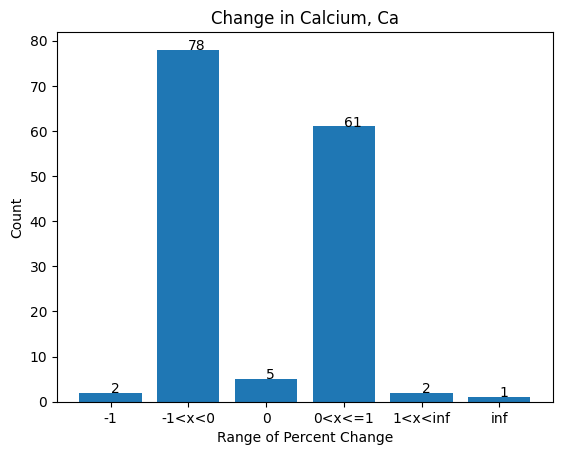

In [412]:
make_comp_bar_chart('Calcium, Ca')

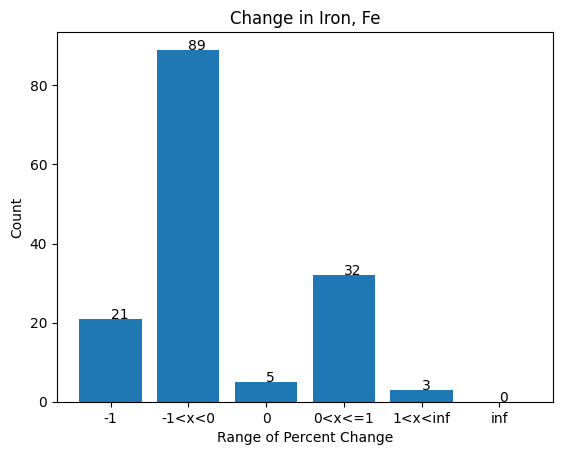

In [413]:
make_comp_bar_chart('Iron, Fe')

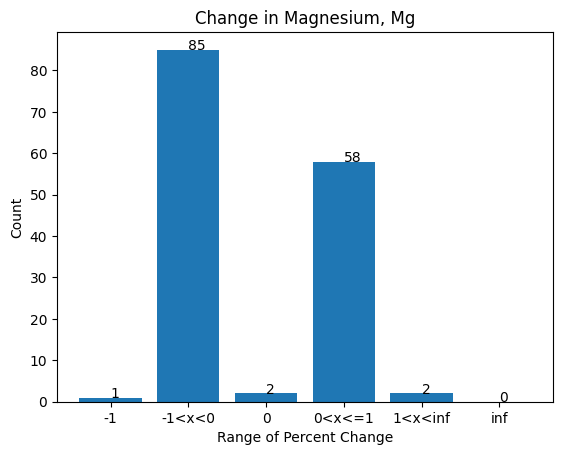

In [414]:
make_comp_bar_chart('Magnesium, Mg')

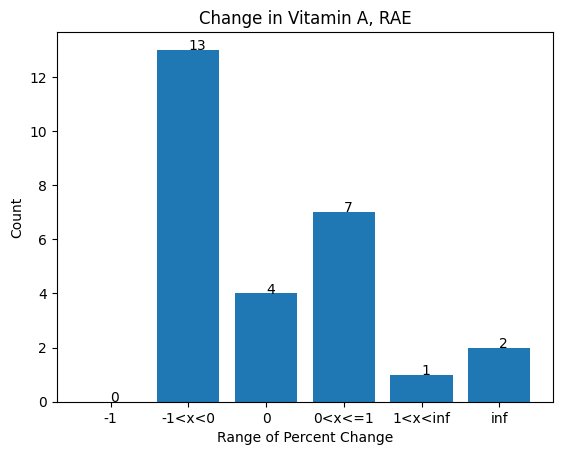

In [415]:
make_comp_bar_chart('Vitamin A, RAE')

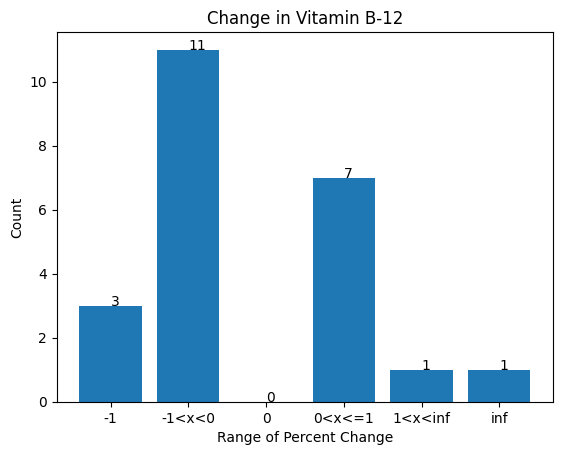

In [416]:
make_comp_bar_chart('Vitamin B-12')

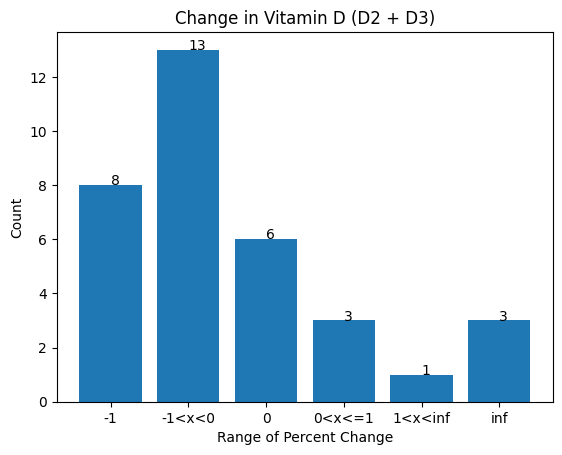

In [417]:
make_comp_bar_chart('Vitamin D (D2 + D3)')

In [418]:
def decreased_content(comp):
  dec_comp_df = net_pos[(net_pos["FF_Component"] == comp) & (net_pos['percent_change']<0)]
  return dec_comp_df[['FF Food description', 'FF_Component', 'percent_change']].sort_values(by="FF Food description")

In [419]:
decreased_content("Calcium, Ca")

FF Food description  \
2993                                                              Almond butter, creamy   
2368                                      Almond milk, unsweetened, plain, shelf stable   
2446                  Apple juice, with added vitamin C, from concentrate, shelf stable   
2105                                                       Apples, fuji, with skin, raw   
2131                                                       Apples, gala, with skin, raw   
2204                                                 Apples, honeycrisp, with skin, raw   
2087                                              Apples, red delicious, with skin, raw   
3612                                      Applesauce, unsweetened, with added vitamin C   
4021     Beans, kidney, dark red, canned, sodium added, sugar added, drained and rinsed   
4067                             Beans, pinto, canned, sodium added, drained and rinsed   
37                             Beans, snap, green, canned, regular pack, drained solids   
4229                                          Beef, chuck, roast, boneless, choice, raw   
4239                                          Beef, flank, steak, boneless, choice, raw   
3771                                         Beef, ground, 80% lean meat / 20% fat, raw   
3750                                         Beef, ground, 90% lean meat / 10% fat, raw   
4183                                         Beef, ribeye, steak, boneless, choice, raw   
4199                                      Beef, round, top round, boneless, choice, raw   
3967                                                                  Blackeye pea, dry   
1488                                                                      Broccoli, raw   
3679                                                             Buckwheat, whole grain   
1872                                                              Butter, stick, salted   
1715                                                            Butter, stick, unsalted   
3520                                                                  Cabbage, red, raw   
2676                                                               Carrots, mature, raw   
733                                                                     Cheese, cheddar   
4394                                                              Cheese, cotija, solid   
778                                                 Cheese, cottage, lowfat, 2% milkfat   
2879                                                 Cheese, feta, whole milk, crumbled   
4293                                                       Cheese, monterey jack, solid   
811                                         Cheese, mozzarella, low moisture, part-skim   
362                          Cheese, pasteurized process, American, vitamin D fortified   
4331                                                          Cheese, provolone, sliced   
3440                                                     Cherries, sweet, dark red, raw   
4146                                           Chicken, breast, boneless, skinless, raw   
3815                                               Chicken, ground, with additives, raw   
4174                                            Chicken, thigh, boneless, skinless, raw   
4012  Chickpeas (garbanzo beans, bengal gram), canned, sodium added, drained and rinsed   
2510                     Cranberry juice, not fortified, from concentrate, shelf stable   
3123                                                                       Cream, heavy   
848                                                                   Egg, whole, dried   
141                                                Egg, whole, raw, frozen, pasteurized   
894                                                                    Egg, yolk, dried   
865                                                 Egg, yolk, raw, frozen, pasteurized   
3038                                                            

In [420]:
decreased_content("Iron, Fe")

FF Food description  \
2378                                    Almond milk, unsweetened, plain, shelf stable   
2436                Apple juice, with added vitamin C, from concentrate, shelf stable   
2117                                                     Apples, fuji, with skin, raw   
2137                                                     Apples, gala, with skin, raw   
2168                                             Apples, granny smith, with skin, raw   
2191                                               Apples, honeycrisp, with skin, raw   
2076                                            Apples, red delicious, with skin, raw   
3609                                    Applesauce, unsweetened, with added vitamin C   
2044                                             Bananas, ripe and slightly ripe, raw   
3987                           Beans, black, canned, sodium added, drained and rinsed   
4096                  Beans, great northern, canned, sodium added, drained and rinsed   
4030   Beans, kidney, dark red, canned, sodium added, sugar added, drained and rinsed   
4043  Beans, kidney, light red, canned, sodium added, sugar added, drained and rinsed   
4000                            Beans, navy, canned, sodium added, drained and rinsed   
44                           Beans, snap, green, canned, regular pack, drained solids   
3448                                                          Beans, snap, green, raw   
4228                                        Beef, chuck, roast, boneless, choice, raw   
3755                                       Beef, ground, 90% lean meat / 10% fat, raw   
4194                                       Beef, ribeye, steak, boneless, choice, raw   
4207                                    Beef, round, top round, boneless, choice, raw   
3969                                                                Blackeye pea, dry   
485                                               Bread, white, commercially prepared   
1487                                                                    Broccoli, raw   
2791                                                              Buttermilk, low fat   
3510                                                              Cabbage, green, raw   
3525                                                                Cabbage, red, raw   
2703                                                               Carrots, baby, raw   
2686                                                             Carrots, mature, raw   
3469                                                                      Celery, raw   
2898                                               Cheese, feta, whole milk, crumbled   
4294                                                     Cheese, monterey jack, solid   
797                                       Cheese, mozzarella, low moisture, part-skim   
272                                                          Cheese, parmesan, grated   
323                        Cheese, pasteurized process, American, vitamin D fortified   
4339                                                        Cheese, provolone, sliced   
4354                                                      Cheese, queso fresco, solid   
1026                                                      Cheese, ricotta, whole milk   
3424                                                   Cherries, sweet, dark red, raw   
4153                                         Chicken, breast, boneless, skinless, raw   
3805                                             Chicken, ground, with additives, raw   
4173                                          Chicken, thigh, boneless, skinless, raw   
3075                                    Cottage cheese, full fat, large or small curd   
2524                   Cranberry juice, not fortified, from concentrate, shelf stable   
3097                                                    Cream cheese, full fat, block   
3133                                                         

In [421]:
decreased_content("Magnesium, Mg")

FF Food description  \
2988                                                            Almond butter, creamy   
2359                                    Almond milk, unsweetened, plain, shelf stable   
2442                Apple juice, with added vitamin C, from concentrate, shelf stable   
2202                                               Apples, honeycrisp, with skin, raw   
2082                                            Apples, red delicious, with skin, raw   
3979                           Beans, black, canned, sodium added, drained and rinsed   
4099                  Beans, great northern, canned, sodium added, drained and rinsed   
4036  Beans, kidney, light red, canned, sodium added, sugar added, drained and rinsed   
3991                            Beans, navy, canned, sodium added, drained and rinsed   
4072                           Beans, pinto, canned, sodium added, drained and rinsed   
50                           Beans, snap, green, canned, regular pack, drained solids   
4230                                        Beef, chuck, roast, boneless, choice, raw   
4245                                        Beef, flank, steak, boneless, choice, raw   
3775                                       Beef, ground, 80% lean meat / 20% fat, raw   
3756                                       Beef, ground, 90% lean meat / 10% fat, raw   
4191                                       Beef, ribeye, steak, boneless, choice, raw   
4080                           Blackeye pea, canned, sodium added, drained and rinsed   
3976                                                                Blackeye pea, dry   
3667                                                           Buckwheat, whole grain   
1899                                                            Butter, stick, salted   
1720                                                          Butter, stick, unsalted   
3519                                                                Cabbage, red, raw   
3476                                                                      Celery, raw   
714                                                                   Cheese, cheddar   
4379                                                            Cheese, cotija, solid   
767                                               Cheese, cottage, lowfat, 2% milkfat   
2881                                               Cheese, feta, whole milk, crumbled   
359                        Cheese, pasteurized process, American, vitamin D fortified   
4155                                         Chicken, breast, boneless, skinless, raw   
3813                                             Chicken, ground, with additives, raw   
4172                                          Chicken, thigh, boneless, skinless, raw   
2516                   Cranberry juice, not fortified, from concentrate, shelf stable   
3100                                                    Cream cheese, full fat, block   
3112                                                                     Cream, heavy   
3495                                                         Cucumber, with peel, raw   
171                                                                 Egg, white, dried   
149                                              Egg, white, raw, frozen, pasteurized   
1695                                                  Eggs, Grade A, Large, egg whole   
3031                                                                 Flaxseed, ground   
3660                                                                    Flour, barley   
3632                                                                 Flour, buckwheat   
1846                                                   Flour, rice, white, unenriched   
1998                                                             Flour, soy, full-fat   
2427                                                        Flour, spelt, whole grain   
1812                                                   Flour,

In [422]:
decreased_content("Vitamin A, RAE")

FF Food description  \
2343               Almond milk, unsweetened, plain, shelf stable   
2045                        Bananas, ripe and slightly ripe, raw   
1514                                               Broccoli, raw   
703                                              Cheese, cheddar   
814                  Cheese, mozzarella, low moisture, part-skim   
291                                     Cheese, parmesan, grated   
369   Cheese, pasteurized process, American, vitamin D fortified   
105                                                    Kale, raw   
1439            Milk, whole, 3.25% milkfat, with added vitamin D   
560                                    Mustard, prepared, yellow   
263                       Pickles, cucumber, dill or kosher dill   
1312    Sausage, breakfast sausage, beef, pre-cooked, unprepared   
2383                                             Spinach, mature   

        FF_Component  percent_change  
2343  Vitamin A, RAE       -0.037209  
2045  Vitamin A, RAE       -0.666667  
1514  Vitamin A, RAE       -0.741935  
703   Vitamin A, RAE       -0.042424  
814   Vitamin A, RAE       -0.089686  
291   Vitamin A, RAE       -0.129771  
369   Vitamin A, RAE       -0.053628  
105   Vitamin A, RAE       -0.518000  
1439  Vitamin A, RAE       -0.304348  
560   Vitamin A, RAE       -0.200000  
263   Vitamin A, RAE       -0.333333  
1312  Vitamin A, RAE       -0.280000  
2383  Vitamin A, RAE       -0.347548

In [423]:
decreased_content("Vitamin B-12")

FF Food description  \
1891                                       Butter, stick, salted   
734                                              Cheese, cheddar   
776                          Cheese, cottage, lowfat, 2% milkfat   
821                  Cheese, mozzarella, low moisture, part-skim   
277                                     Cheese, parmesan, grated   
335   Cheese, pasteurized process, American, vitamin D fortified   
3108                               Cream cheese, full fat, block   
3119                                                Cream, heavy   
3137                                       Cream, sour, full fat   
1340             Sausage, Italian, pork, mild, cooked, pan-fried   
1283    Sausage, breakfast sausage, beef, pre-cooked, unprepared   
2334                  Soy milk, unsweetened, plain, shelf stable   
939                                 Yogurt, Greek, plain, nonfat   
976                            Yogurt, Greek, strawberry, nonfat   

      FF_Component  percent_change  
1891  Vitamin B-12       -1.000000  
734   Vitamin B-12       -0.036364  
776   Vitamin B-12       -0.106383  
821   Vitamin B-12       -0.017857  
277   Vitamin B-12       -0.035714  
335   Vitamin B-12       -0.033333  
3108  Vitamin B-12       -1.000000  
3119  Vitamin B-12       -1.000000  
3137  Vitamin B-12       -0.705952  
1340  Vitamin B-12       -0.184615  
1283  Vitamin B-12       -0.443350  
2334  Vitamin B-12       -0.645856  
939   Vitamin B-12       -0.066667  
976   Vitamin B-12       -0.081633

In [424]:
decreased_content("Vitamin D (D2 + D3)")

FF Food description  \
2342                               Almond milk, unsweetened, plain, shelf stable   
4373                                                       Cheese, cotija, solid   
2873                                          Cheese, feta, whole milk, crumbled   
4272                                                Cheese, monterey jack, solid   
4297       Cheese, pasteurized process cheese food or product, American, singles   
4323                                                   Cheese, provolone, sliced   
4348                                                 Cheese, queso fresco, solid   
140                                         Egg, whole, raw, frozen, pasteurized   
868                                          Egg, yolk, raw, frozen, pasteurized   
1126         Milk, lowfat, fluid, 1% milkfat, with added vitamin A and vitamin D   
1210  Milk, nonfat, fluid, with added vitamin A and vitamin D (fat free or skim)   
1229    Milk, reduced fat, fluid, 2% milkfat, with added vitamin A and vitamin D   
1408                            Milk, whole, 3.25% milkfat, with added vitamin D   
2626                                                           Mushroom, crimini   
2600                                                             Mushroom, enoki   
2652                                                           Mushroom, maitake   
2235                                                            Mushroom, oyster   
2574                                                        Mushroom, portabella   
2262                                                         Mushrooms, shiitake   
2289                                                     Mushrooms, white button   
2316                                  Soy milk, unsweetened, plain, shelf stable   

             FF_Component  percent_change  
2342  Vitamin D (D2 + D3)       -0.073000  
4373  Vitamin D (D2 + D3)       -1.000000  
2873  Vitamin D (D2 + D3)       -1.000000  
4272  Vitamin D (D2 + D3)       -1.000000  
4297  Vitamin D (D2 + D3)       -0.320000  
4323  Vitamin D (D2 + D3)       -1.000000  
4348  Vitamin D (D2 + D3)       -1.000000  
140   Vitamin D (D2 + D3)       -0.115385  
868   Vitamin D (D2 + D3)       -0.033333  
1126  Vitamin D (D2 + D3)       -0.116667  
1210  Vitamin D (D2 + D3)       -0.083333  
1229  Vitamin D (D2 + D3)       -0.058333  
1408  Vitamin D (D2 + D3)       -0.261538  
2626  Vitamin D (D2 + D3)       -1.000000  
2600  Vitamin D (D2 + D3)       -1.000000  
2652  Vitamin D (D2 + D3)       -0.943060  
2235  Vitamin D (D2 + D3)       -0.942000  
2574  Vitamin D (D2 + D3)       -1.000000  
2262  Vitamin D (D2 + D3)       -0.859500  
2289  Vitamin D (D2 + D3)       -0.891500  
2316  Vitamin D (D2 + D3)       -0.432500